### Hands-on 1: Percepton Notebook (Tutorial) Ramiro Amador Guerra

# 1. Fundamentos de la técnica

El perceptrón es uno de los primeros modelos de aprendizaje automático supervisado.
Fue propuesto por Frank Rosenblatt en 1958 y se utiliza para **clasificación binaria** (dos clases).

La idea principal es aprender una frontera de decisión lineal que separe los datos en dos categorías,
ajustando los pesos de las características de entrada según los errores cometidos durante el entrenamiento.


## 2. Modelo Matemático

El modelo del perceptrón puede expresarse como:

$$
y = f(\mathbf{w} \cdot \mathbf{x} + b)
$$

donde:
* $\mathbf{x} = [x_1, x_2, ..., x_n]$ son las características de entrada,
* $\mathbf{w} = [w_1, w_2, ..., w_n]$ son los pesos,
* $b$ es el sesgo,
* $f(z)$ es la función de activación, normalmente el **signo** (función escalón unitario):

$$
f(z) = \begin{cases}
1 & \text{si } z \ge 0 \\
0 & \text{si } z < 0
\end{cases}
$$

El objetivo del aprendizaje es ajustar $\mathbf{w}$ y $b$ para minimizar los errores de clasificación.

# 3. Librerías y funciones en Python

Usaremos la librería **scikit-learn**, específicamente la clase `Perceptron` del módulo `sklearn.linear_model`.

### Clases y funciones principales:
- `sklearn.linear_model.Perceptron`: Implementa el modelo del perceptrón.
- `.fit(X, y)`: Entrena el modelo.
- `.predict(X)`: Predice las etiquetas de nuevos datos.
- `accuracy_score(y_true, y_pred)`: Calcula la precisión (accuracy) del modelo.


In [9]:
# Importar librerías necesarias
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 4.1 Feature Engineering

En esta sección generaremos un conjunto de datos sintético (ficticio) para clasificar dos clases.
Usaremos `make_classification` de Scikit-learn.


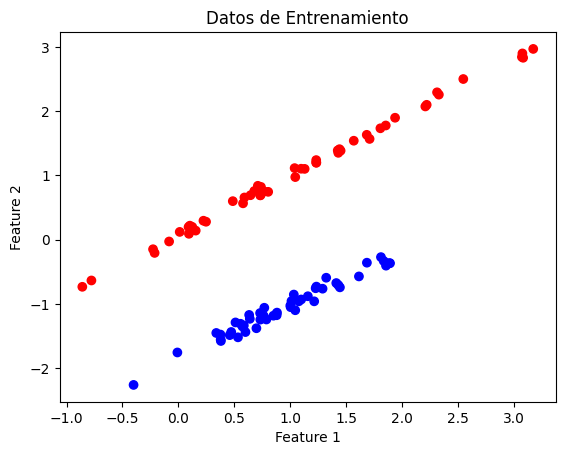

In [10]:
# Generar datos sintéticos
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_clusters_per_class=1, n_redundant=0, random_state=42
)

# Visualizar los datos
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title("Datos de Entrenamiento")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 4.2 Model Selection

Elegimos un **clasificador lineal (Perceptrón)** porque:
- Es eficiente en problemas linealmente separables.
- Su simplicidad permite interpretar la frontera de decisión.
- Sirve como base para modelos más complejos (como SVM y redes neuronales).


# 4.3 Model Training
Entrenaremos el modelo con el 80% de los datos y probaremos con el 20% restante.


In [11]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el perceptrón
model = Perceptron(max_iter=1000, eta0=1.0, random_state=42)
model.fit(X_train, y_train)


Perceptron(random_state=42)

# 4.4 Prediction

Usamos el modelo para predecir las etiquetas del conjunto de prueba.


In [12]:
# Predicciones
y_pred = model.predict(X_test)

# Verificamos algunas predicciones
print("Predicciones:", y_pred)
print("Etiquetas reales:", y_test)


Predicciones: [0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]
Etiquetas reales: [0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0]


# 4.5 Model Evaluation

Calculamos la **precisión (Accuracy)**, que mide el porcentaje de aciertos del modelo.


In [13]:
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acc:.2f}")


Precisión del modelo: 1.00


### Evaluación del Modelo — Accuracy 📏

La métrica **Accuracy (Precisión)** mide qué proporción de las predicciones del modelo son correctas.
Se calcula como:

$$
\text{Accuracy} = \frac{\text{número de predicciones correctas}}{\text{total de predicciones}}
$$

Un valor de **accuracy cercano a 1 (o 100%)** significa que el modelo clasifica correctamente casi todos los ejemplos, mientras que un valor bajo indica que el modelo comete muchos errores.

En el contexto del perceptrón, una alta precisión sugiere que los datos son **linealmente separables**, y que la frontera de decisión aprendida es adecuada.  
Si la precisión es baja, podría ser necesario:
- Aumentar las iteraciones de entrenamiento (`max_iter`),
- Ajustar la tasa de aprendizaje (`eta0`),
- O considerar un modelo más complejo si los datos no son lineales.


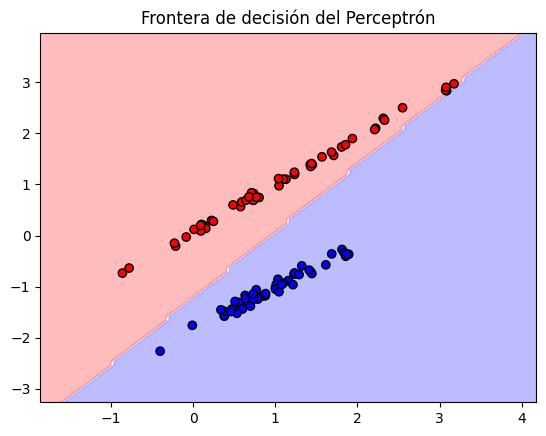

In [14]:
import numpy as np

# Dibujar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.title("Frontera de decisión del Perceptrón")
plt.show()
